In [43]:
import numpy as np
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy.signal import find_peaks
from uncertainties.umath import sin
from IPython.display import display, Math

def latex(latex_str):
    display({'text/latex': latex_str}, raw=True)

e = 1.602*1e-19
h = 6.626*1e-34
m_e = 9.109e-31 
c = 299792458  #muss noch genaueren wert eintragen

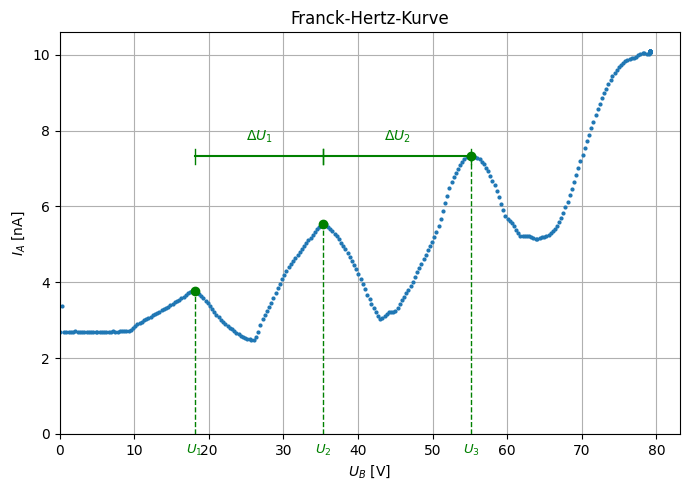

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
#Automatische Franck-Herz-Kurve

#Anfangsparameter
#U_B = I_A
#U_2/10 = U_A
#U_1 =
#U_3 = 

FHKurve = pd.read_csv("FH-FrNm06.csv", sep=';', decimal=',')

U_1 = FHKurve['U_A1'].values*10  # []
I_1 = FHKurve['U_B1'].values  # []
U = U_1[35:-30]
I = I_1[35:-30]
peaks, _ = find_peaks(I)

# maxima von U und I
peak_U = U[peaks]
peak_I = I[peaks]

plt.figure(figsize=(7, 5))
plt.plot(U_1, I_1, 'o', markersize=2)

#Strichlinien und Peaks
plt.plot(peak_U, peak_I, 'go', label="Lokale Maxima", markersize=6, zorder=10)
for u, i in zip(peak_U, peak_I):
    plt.plot([u, u], [0, i], 'g--', linewidth=1, zorder=10)
# U_1,U_2... Labels
for i, u in enumerate(peak_U):
    plt.text(u, -0.24, f"$U_{{{i+1}}}$", color='green', ha='center', va='top', fontsize=9.5)



# Spannungs Differenzen zeichnen, horizontale linie und trennlinien
linie = np.max(peak_I) * 1
trenn = 0.2

for i in range(len(peak_U) - 1):
    x1, x2 = peak_U[i], peak_U[i+1]
    
   
    plt.plot([x1, x2], [linie, linie], '-', linewidth=1.5, color='green')
    
   
    plt.plot([x1, x1], [linie - trenn, linie + trenn], 'g-', linewidth=1)
    plt.plot([x2, x2], [linie - trenn, linie + trenn], 'g-', linewidth=1)
    
    # ΔU label
    mid_x = (x1 + x2) / 2
    plt.text(mid_x, linie + 0.3, 
             rf"$\Delta U_{{{i+1}}}$", 
             fontsize=10, ha='center', va='bottom', color='green')



plt.xlabel("$U_B$ [V]")
plt.ylabel("$I_A$ [nA]")
plt.title("Franck-Hertz-Kurve")
plt.ylim(bottom=0)
plt.xlim(left=0)
#plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS9/Franck-Hertz-Kurve.pdf")
plt.show()


# Peak Schwepunktes
weighted_peak_Us = []

window = 20  # Indizes um das Maximum

for peak_idx in peaks:
    start = max(peak_idx - window, 0)
    end = min(peak_idx + window + 1, len(U))
    
    U_window = U[start:end]
    I_window = I[start:end]
    
    weighted_mean_U = np.sum(U_window * I_window) / np.sum(I_window)
    variance = np.sum(I_window * (U_window - weighted_mean_U)**2) / np.sum(I_window)
    std_U = np.sqrt(variance)
    
    weighted_peak_Us.append(ufloat(weighted_mean_U, std_U))

#U_i mit Unsicherheit
for i, u_val in enumerate(weighted_peak_Us):
    display(Math(rf"U_{{{i+1}}} = {u_val:.3f}~\mathrm{{V}}"))
print()

#Delta U
delta_Us = [u2 - u1 for u1, u2 in zip(weighted_peak_Us[:-1], weighted_peak_Us[1:])]

for i, delta in enumerate(delta_Us):
    display(Math(rf"\Delta U_{{{i+1}}} = {delta:.3f}~\mathrm{{V}}"))
print()



#Differenzen
mean_delta_U = np.mean(unp.nominal_values(delta_Us))
std_delta_U = np.std(unp.nominal_values(delta_Us), ddof=1)
std_delta_U_mean = std_delta_U / np.sqrt(len(unp.nominal_values(delta_Us)))
ΔU = ufloat(mean_delta_U, std_delta_U_mean)
display(Math(rf"\langle \Delta U \rangle = {ΔU:.3f}~\mathrm{{V}}"))
print()

ΔE = ΔU*e




display(Math(rf"\Delta E = {ΔE/e:.3f}~\mathrm{{eV}}"))

In [45]:
# Manuell leuchtzonen zählen

U = [21.1,39.3,57.5]
U_std = [0.5,0.5,0.5]
I = [1,2,3,4]
Anzahl = [1,2,3]

# delta_U = np.diff(U)

# for i, delta in enumerate(delta_U):
#     display(Math(rf"\Delta U_{{{i+1}}} = {delta:.3f}~\mathrm{{V}}"))
# print()
# mean_delta_U = np.mean(delta_U)
# std_delta_U = np.std(delta_U, ddof=1)
# ΔU = ufloat(mean_delta_U, std_delta_U)
# display(Math(rf"\langle \Delta U \rangle = {ΔU:.3f}~\mathrm{{V}}"))
# print()

U_1 = ufloat(21.1,5)
U_2 = ufloat(39.3,5)
U_3 = ufloat(57.5,5)
U_12 = U_2-U_1
U_23 = U_3-U_2

ΔU = (U_12+U_23)/2

display(Math(rf" \Delta U_1 = {U_12:.3f}~\mathrm{{V}}"))
display(Math(rf"\Delta U_2 = {U_23:.3f}~\mathrm{{V}}"))

display(Math(rf"\langle \Delta U \rangle = {ΔU:.3f}~\mathrm{{V}}"))

ΔE = ΔU*e

display(Math(rf"\Delta E = {ΔE/e:.3f}~\mathrm{{eV}}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [56]:
#Bestimmung der Wellenlänge

d = (1/3)*1e-5            #gitterkonstante


#1 wellenlänge Blau
θ_1 = ufloat(7+(9/30),0.1)          #links
θ_2 = ufloat(360-(348+(15/30)),0.1)          #rechts

θ = ((θ_2+θ_1)/2)*(np.pi/180)

λ_1 = d*sin(θ)


#2 wellenlänge Rot
Θ_1 = ufloat(2+(15/30),0.1)          #links
Θ_2 = ufloat(360-(341+(25/30)),0.1)          #rechts



Θ = ((Θ_2+Θ_1)/2)*(np.pi/180)

λ_2 = d*sin(Θ)

f_1 = c/λ_1
f_2 = c/λ_2

E_1 = (h*f_1)/e #in eV
E_2 = (h*f_2)/e #in eV

E = E_2-E_1


display(Math(rf"\vartheta_1 = {θ*(180/np.pi):.3f}~\mathrm{{m}}"))
display(Math(rf"\vartheta_2 = {Θ*(180/np.pi):.3f}~\mathrm{{m}}"))
display(Math(rf"\lambda_1 = {λ_1:.4e}~\mathrm{{m}}"))
display(Math(rf"\lambda_2 = {λ_2:.4e}~\mathrm{{m}}"))
print()
display(Math(rf"E_1 = {E_1:.3f}~\mathrm{{eV}}"))
display(Math(rf"E_2 = {E_2:.3f}~\mathrm{{eV}}"))
display(Math(rf"\Delta E = {E:.2f}~\mathrm{{eV}}"))



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

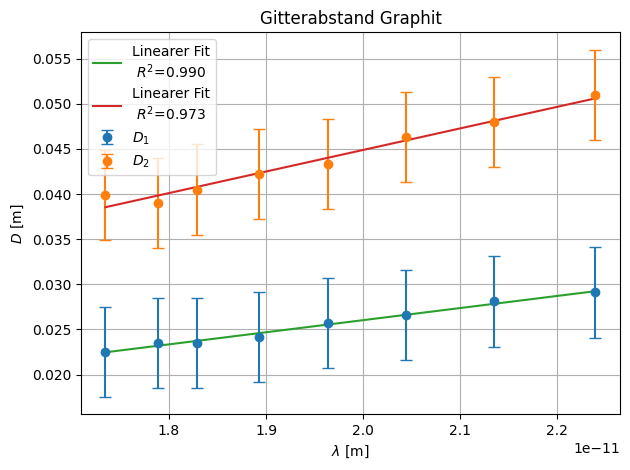

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [89]:
#Elektronenbeugung

L= ufloat(13.27,1)*1e-2
U = np.array([3,3.3,3.6,3.9,4.2,4.5,4.7,5])*1e3

D_1 = np.array([2.91,2.81,2.66,2.57,2.42,2.35,2.35,2.25])*1e-2
D_2 = np.array([5.1,4.80,4.63,4.33,4.22,4.05,3.9,3.99])*1e-2
Std_D = np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])*1e-2


λ = h/(np.sqrt(2*m_e*e*U))
λ_1 = np.max(λ)

k_1, y_1, r_1, _, std_k_1 = linregress(λ, D_1)
d_1 = ufloat(k_1,std_k_1)/(2*L)

k_2, y_2, r_2, _, std_k_2 = linregress(λ, D_2)
d_2 = ufloat(k_2,std_k_2)/(2*L)

plt.Figure
plt.errorbar(λ, D_1, yerr=Std_D, capsize=4, fmt='o', label='$D_1$')
plt.errorbar(λ, D_2, yerr=Std_D, capsize=4, fmt='o', label='$D_2$')
plt.plot(λ, k_1*λ+y_1, label=f'Linearer Fit\n $R^2$={r_1**2:.3f}')
plt.plot(λ, k_2*λ+y_2, label=f'Linearer Fit\n $R^2$={r_2**2:.3f}')
plt.xlabel("$λ$ [m]")
plt.ylabel("$D$ [m]")
plt.title("Gitterabstand Graphit")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS9/Graphit_gitterabstand.pdf")
plt.show()

display(Math(rf"\lambda = {λ_1:.2e}~\mathrm{{m}}"))
display(Math(rf"d_1 = {d_1**-1:.3e}~\mathrm{{m}}"))
display(Math(rf"d_2 = {d_2**-1:.3e}~\mathrm{{m}}"))


In [ ]:
Aus_Kennlinie_verstärker = pd.read_csv("Kennlinie_Zener_Diode.csv", sep=',', decimal='.')
U_1 = Aus_Kennlinie_verstärker['U_1'].values
I_1 = Aus_Kennlinie_verstärker['I_1'].values

U_2 = Aus_Kennlinie_verstärker['U_2'].values
I_2 = Aus_Kennlinie_verstärker['I_2'].values

U_3 = Aus_Kennlinie_verstärker['U_3'].values
I_3 = Aus_Kennlinie_verstärker['I_3'].values

U_4 = Aus_Kennlinie_verstärker['U_4'].values
I_4 = Aus_Kennlinie_verstärker['I_4'].values    

plt.figure(figsize=(7, 5))
plt.plot(U_1,I_1, '-', markersize=3,zorder=10)
plt.plot(U_2,I_2, '-', markersize=3,zorder=10)
plt.plot(U_3,I_3, '-', markersize=3,zorder=10)
plt.plot(U_4,I_4, '-', markersize=3,zorder=10)
plt.xlabel("$U$ [V]")
plt.ylabel("$I$ [A]")
plt.title("Strom-Spannungs-Kennlinie Si-Diode")
#plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS10/Kennlinie_zener_diode.pdf")
plt.show()
